In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('Student_performance_data _.csv')

In [20]:
print(df.head())
print(df.isnull().sum())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [22]:
df['StudyTimeAbsences'] = df['StudyTimeWeekly'] * df['Absences']
df['StudyTimeVolunteering'] = df['StudyTimeWeekly'] * df['Volunteering']
df['ExtracurricularVolunteering'] = df['Extracurricular'] * df['Volunteering']

In [23]:
print(df.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  StudyTimeAbsences  \
0             0  2.929196         2.0 

In [24]:
gpa_min = df['GPA'].min()
gpa_max = df['GPA'].max()
df['ScaledGPA'] = 1 + ((df['GPA'] - gpa_min) * (10 - 1)) / (gpa_max - gpa_min)

In [25]:
df['AbsencesPercentage'] = (df['Absences'] / 6) * 100

In [26]:
df['Tutoring'] = df['Tutoring'].apply(lambda x: 1 if x == 1 else 0)
df['Extracurricular'] = df['Extracurricular'].apply(lambda x: 1 if x > 0 else 0)
df['Volunteering'] = df['Volunteering'].apply(lambda x: 1 if x > 0 else 0)

In [27]:
X = df[['StudyTimeWeekly', 'AbsencesPercentage', 'Tutoring', 'Extracurricular', 'Volunteering',
        'StudyTimeAbsences', 'StudyTimeVolunteering', 'ExtracurricularVolunteering']]
y = df['ScaledGPA']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [31]:
y_pred_rf = rf_model.predict(X_test_scaled)

In [32]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R2: {r2_rf}')

Random Forest MSE: 0.5265967234262394
Random Forest R2: 0.8742109041329686


In [35]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [36]:
y_pred_gb = gb_model.predict(X_test_scaled)

In [38]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Gradient Boosting MSE: {mse_gb}')
print(f'Gradient Boosting R2: {r2_gb}')

Gradient Boosting MSE: 0.46152169439220897
Gradient Boosting R2: 0.8897554920530226


In [41]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Random Forest: Predicted vs Actual')

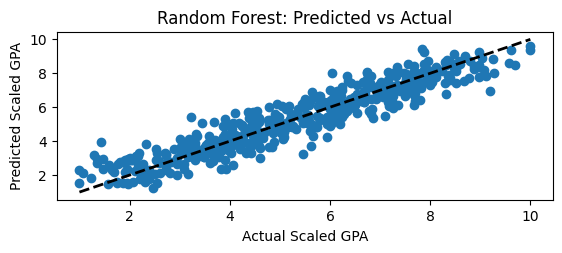

In [43]:
plt.subplot(2, 1, 1)
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Scaled GPA')
plt.ylabel('Predicted Scaled GPA')
plt.title('Random Forest: Predicted vs Actual')

In [44]:
import joblib

joblib.dump(gb_model, 'gradient_boosting_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [45]:
print(df.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  StudyTimeAbsences  \
0             0  2.929196         2.0 